In [1]:
import os
from google.colab import drive 
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/AI')

Mounted at /content/drive


In [2]:
from keras import datasets, Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from numpy import save
import keras
from os import listdir
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
folder0 = 'Shape/Heart'
folder1 = 'Shape/Oblong'
folder2 = 'Shape/Oval'
folder3 = 'Shape/Round'
folder4 = 'Shape/Square'
folders=[folder0,folder1,folder2,folder3,folder4]
photos, labels = list(), list()
for i in range (5):
  for file in listdir(folders[i]):
    output=i
    photo = load_img(folders[i]+'/'+file, target_size=(128,128))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('Shape/shape_photos.npy',photos)
save('Shape/shape_labels.npy',labels)

(4000, 128, 128, 3) (4000,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [5]:
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [6]:
"""# Shape Face Model
we define the Cnn model here, we are using a sequential model ie data will travel sequentially from one layer to another without any jumps and splitting.
"""
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(5, activation='softmax')) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [7]:
opt = SGD(lr=0.01, momentum=0.9)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1,validation_data=(x_test, y_test), callbacks=[callback])
model.save('shapeface_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
88/88 [==============================] - 16s 39ms/step - loss: 1.9508 - accuracy: 0.1971 - val_loss: 1.6104 - val_accuracy: 0.1833
Epoch 2/100
88/88 [==============================] - 3s 30ms/step - loss: 1.6097 - accuracy: 0.2036 - val_loss: 1.6088 - val_accuracy: 0.1967
Epoch 3/100
88/88 [==============================] - 3s 30ms/step - loss: 1.6091 - accuracy: 0.2082 - val_loss: 1.6073 - val_accuracy: 0.2483
Epoch 4/100
88/88 [==============================] - 3s 30ms/step - loss: 1.6045 - accuracy: 0.2482 - val_loss: 1.6014 - val_accuracy: 0.2475
Epoch 5/100
88/88 [==============================] - 3s 30ms/step - loss: 1.5918 - accuracy: 0.2618 - val_loss: 1.5830 - val_accuracy: 0.2433
Epoch 6/100
88/88 [==============================] - 3s 31ms/step - loss: 1.5453 - accuracy: 0.3075 - val_loss: 1.5790 - val_accuracy: 0.2892
Epoch 7/100
88/88 [==============================] - 3s 31ms/step - loss: 1.4789 - accuracy: 0.3754 - val_loss: 1.4933 - val_accuracy: 0.3633
Epoch

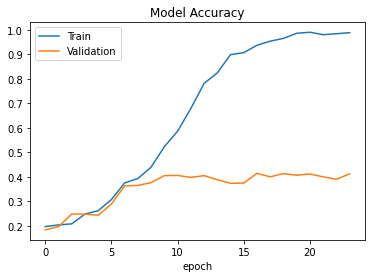

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

Giá trị dự đoán: 4


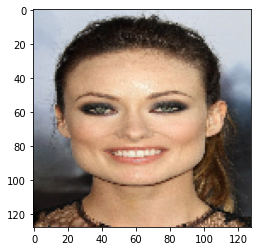

In [9]:
from keras.preprocessing.image   import load_img
from keras.preprocessing.image  import img_to_array
from keras.models               import load_model
import numpy as np
import matplotlib.pyplot as plt

img = load_img('Shape/test.jpg', target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128, 3)
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('Shape/shapeface_model.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

Giá trị dự đoán: 0


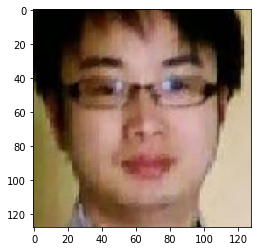

In [10]:
from keras.preprocessing.image   import load_img
from keras.preprocessing.image  import img_to_array
from keras.models               import load_model
import numpy as np
import matplotlib.pyplot as plt

img = load_img('Shape/test1.jpg', target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128, 3)
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('Shape/shapeface_model.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()